In [13]:
#lib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,roc_curve ,roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# clear warning messages
import warnings
warnings.filterwarnings("ignore")

In [5]:
data= pd.read_csv(r'C:\Users\Admin\Desktop\Dataset\Files-main\Files-main\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


as you can see outcome is lable and class,so we can see that person has diabetes or not (1 yes ,0 no)and all others value are features

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


here we can see that all features counts so let's go ahead.But we can see it min value is 0 of many features and max value is not correct so we are going to fix this thing

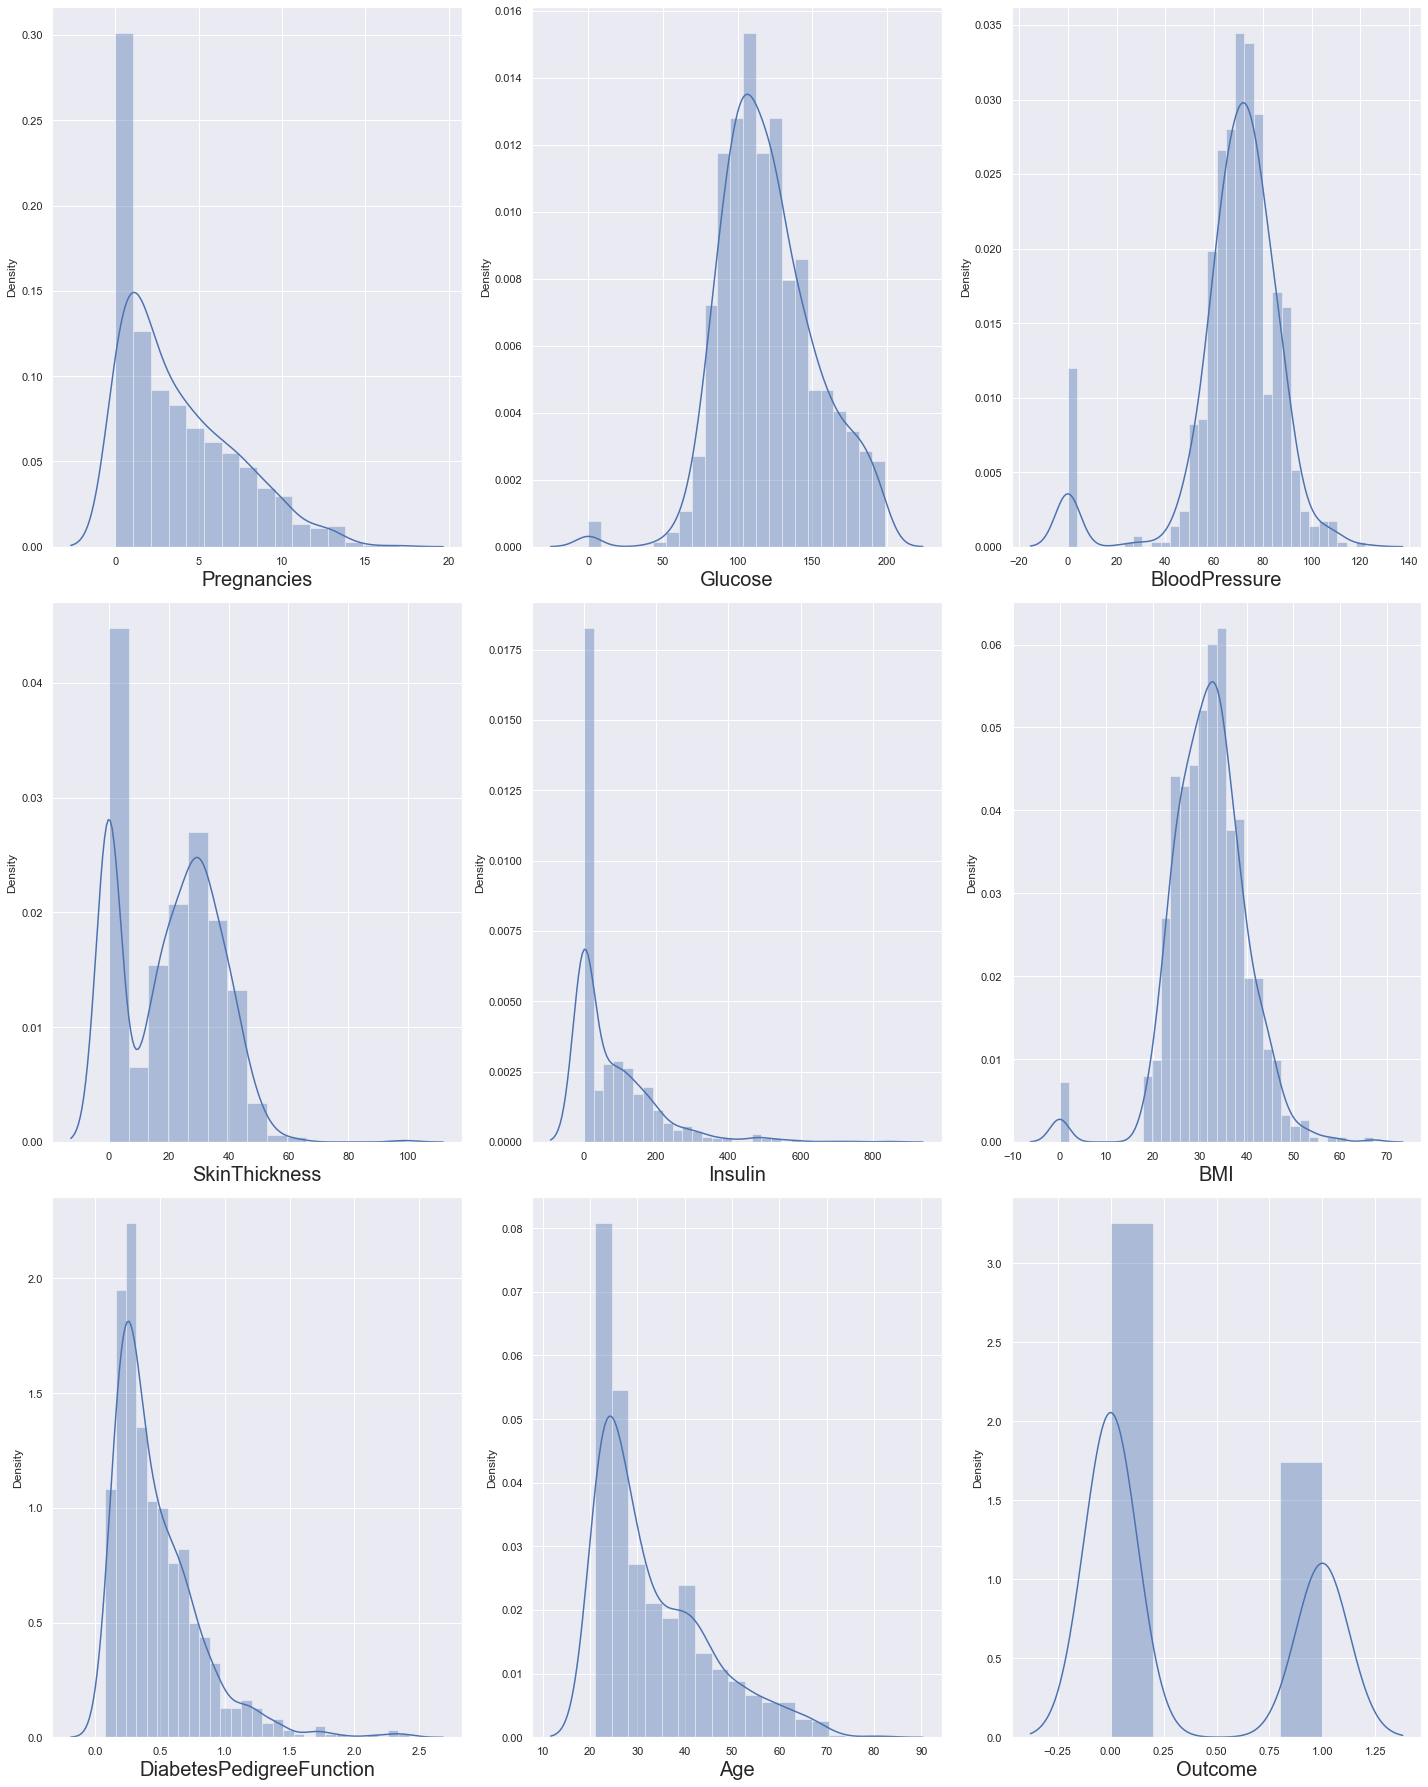

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9: #total column is 9 so we take 9
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)         
  
    plotnumber+=1
plt.tight_layout()     
plt.show()

As we see in there is some skewness in data, let's deal with it

also , we can see there are few data column Glucose ,BloodPressure ,insulin ,skin thickness and BMI which have value as 0.
that's impossible .you can do a quick search to see that one cannot have a 0 values for these .Let's deal with that .We can either remove such data or simply replace it with their respective mean values .let's so the latter.

In [20]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

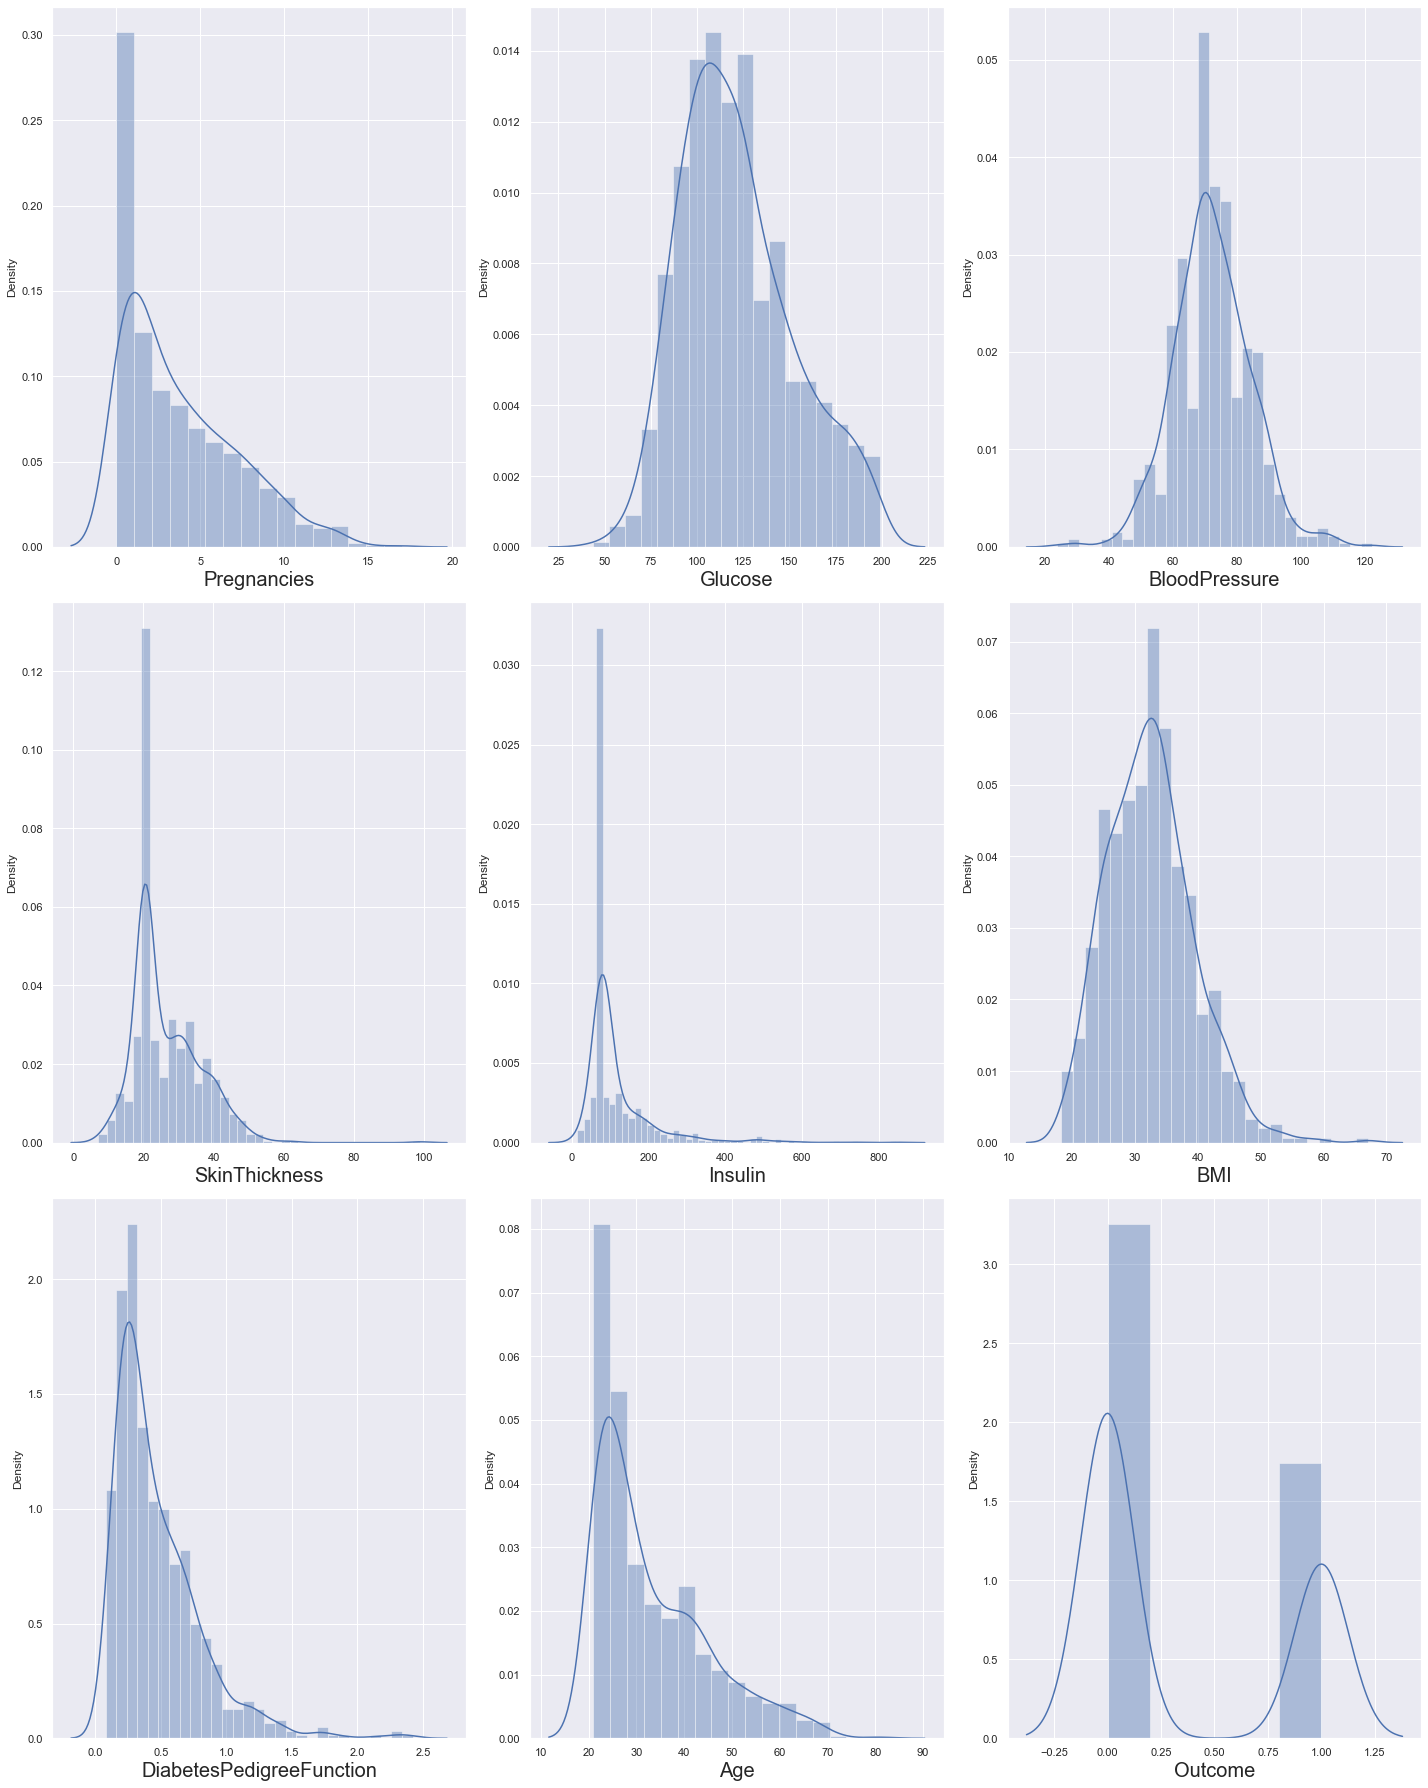

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9: #total column is 9 so we take 9
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)         
  
    plotnumber+=1
plt.tight_layout()     
plt.show()

<AxesSubplot:>

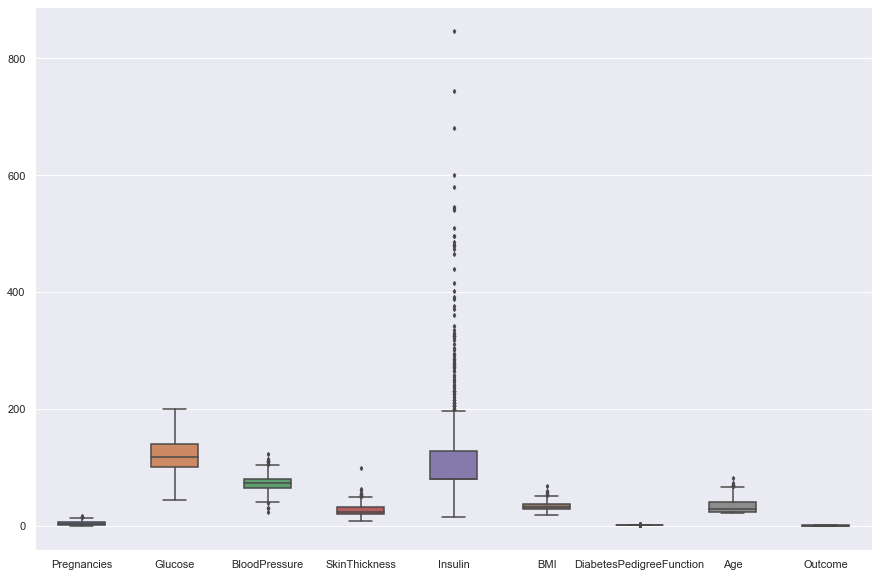

In [24]:
fig ,ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width =0.5,ax=ax ,fliersize=3)

In [33]:
q= data['Pregnancies'].quantile(0.98)
#we have removing the top 2% data from the Pregnancies column
data_cleaned =data[data['Pregnancies']<q]
q=data_cleaned['BMI'].quantile(0.99)
#we have removing the top 1% data from the Pregnancies column
data_cleaned =data_cleaned[data_cleaned['BMI']<q]
q=data_cleaned['SkinThickness'].quantile(0.99)
#we have removing the top 1% data from the Pregnancies column
data_cleaned =data_cleaned[data_cleaned['SkinThickness']<q]
q=data_cleaned['Insulin'].quantile(0.91)
#we have removing the top 5% data from the Pregnancies column
data_cleaned =data_cleaned[data_cleaned['Insulin']<q]
q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.95)
#we have removing the top 1% data from the Pregnancies column
data_cleaned =data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q=data_cleaned['Age'].quantile(0.99)
#we have removing the top 1% data from the Pregnancies column
data_cleaned =data_cleaned[data_cleaned['Age']<q]

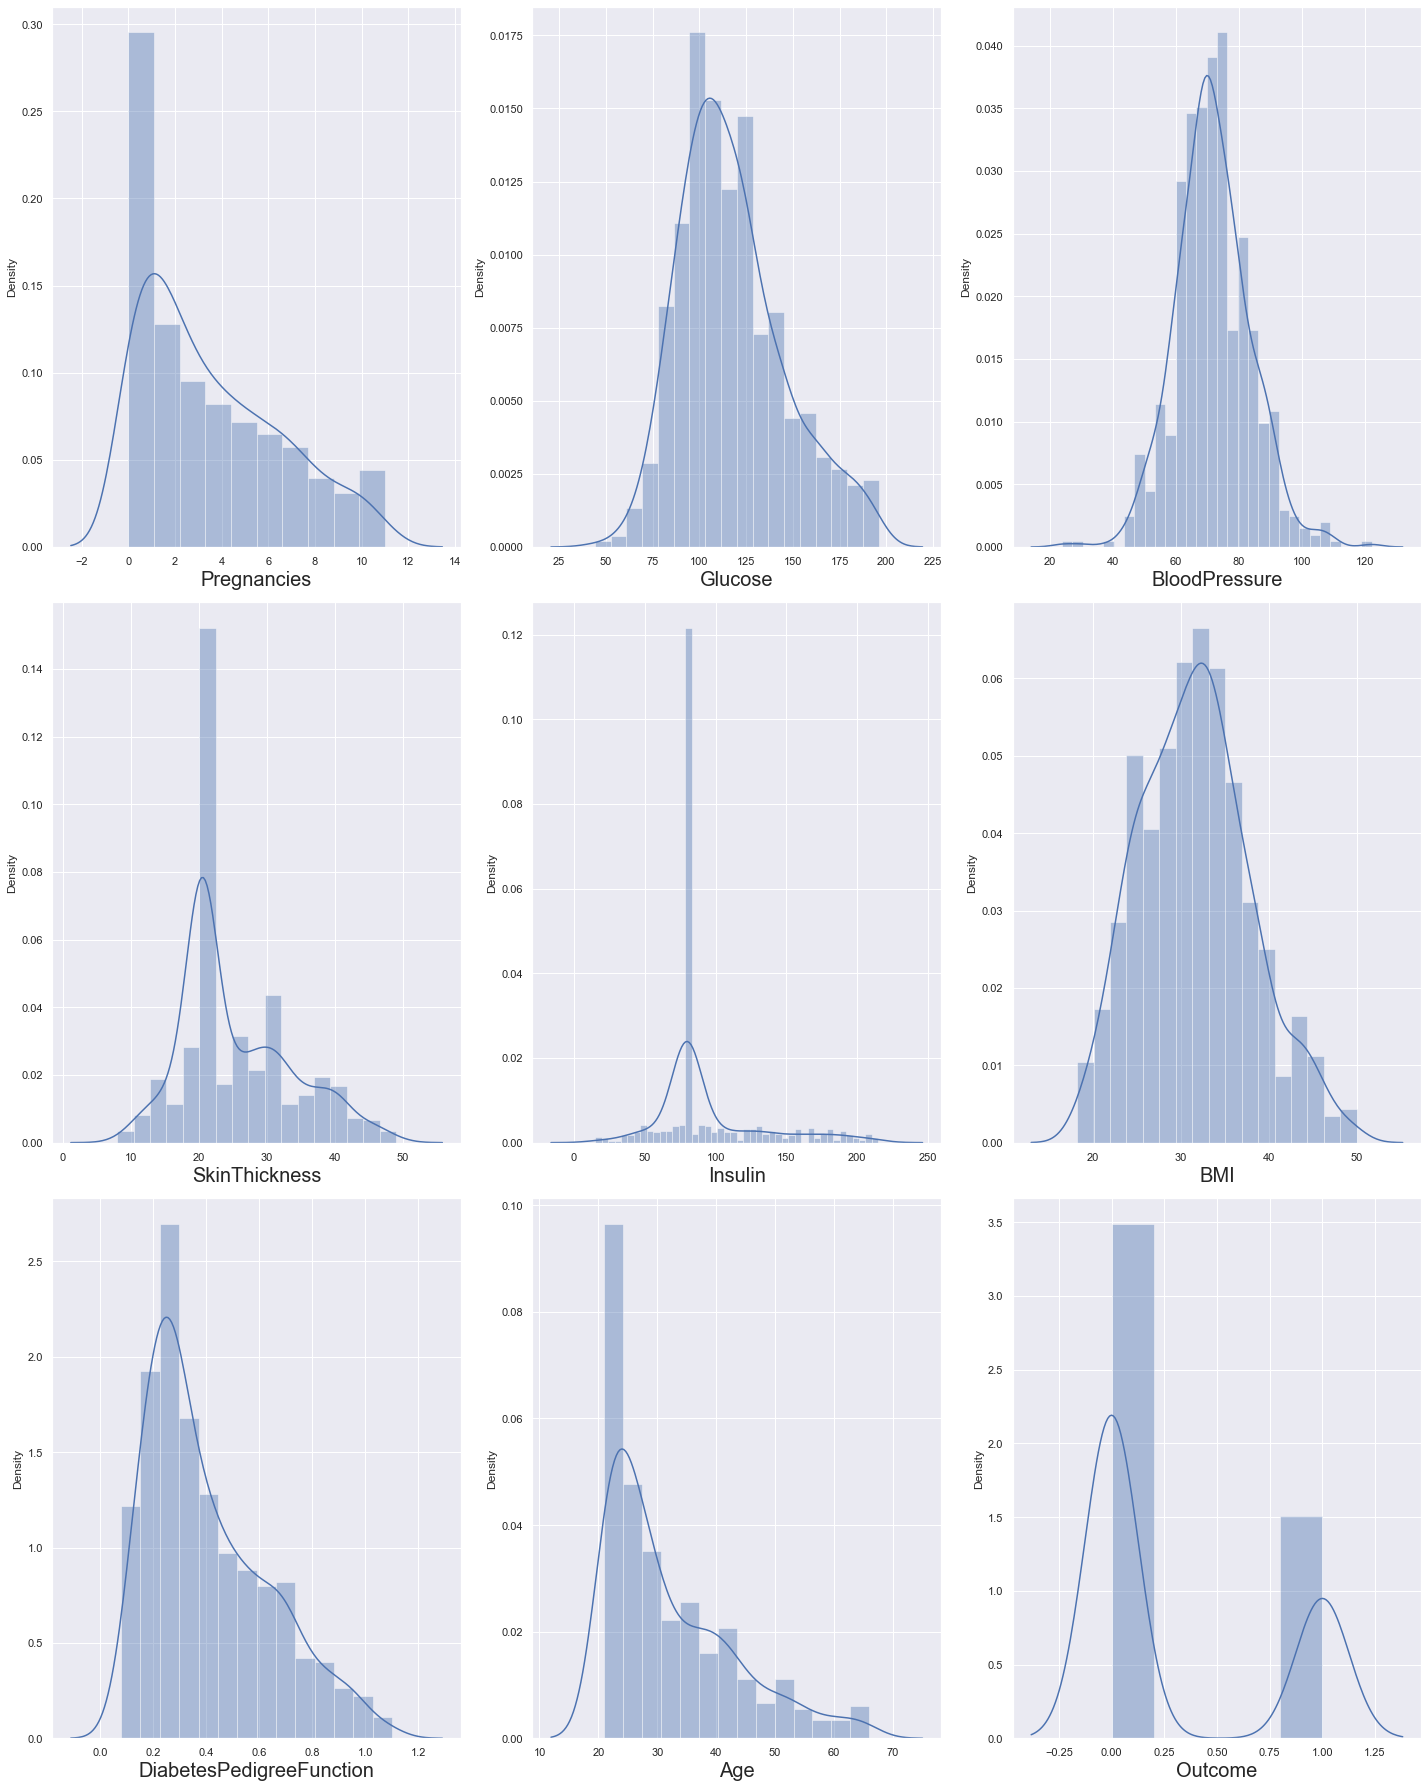

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9: #total column is 9 so we take 9
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)         
  
    plotnumber+=1
plt.tight_layout()     
plt.show()

the data looks now better now than before .We will start our ananlysis with this data now as we don't want to lose important information .If our  model doesn't work with accurancy ,we will come back for many preprocessing.

In [36]:
x= data.drop(columns=['Outcome'])
y=data['Outcome']

let's visualize relationship between our independent variable and categories

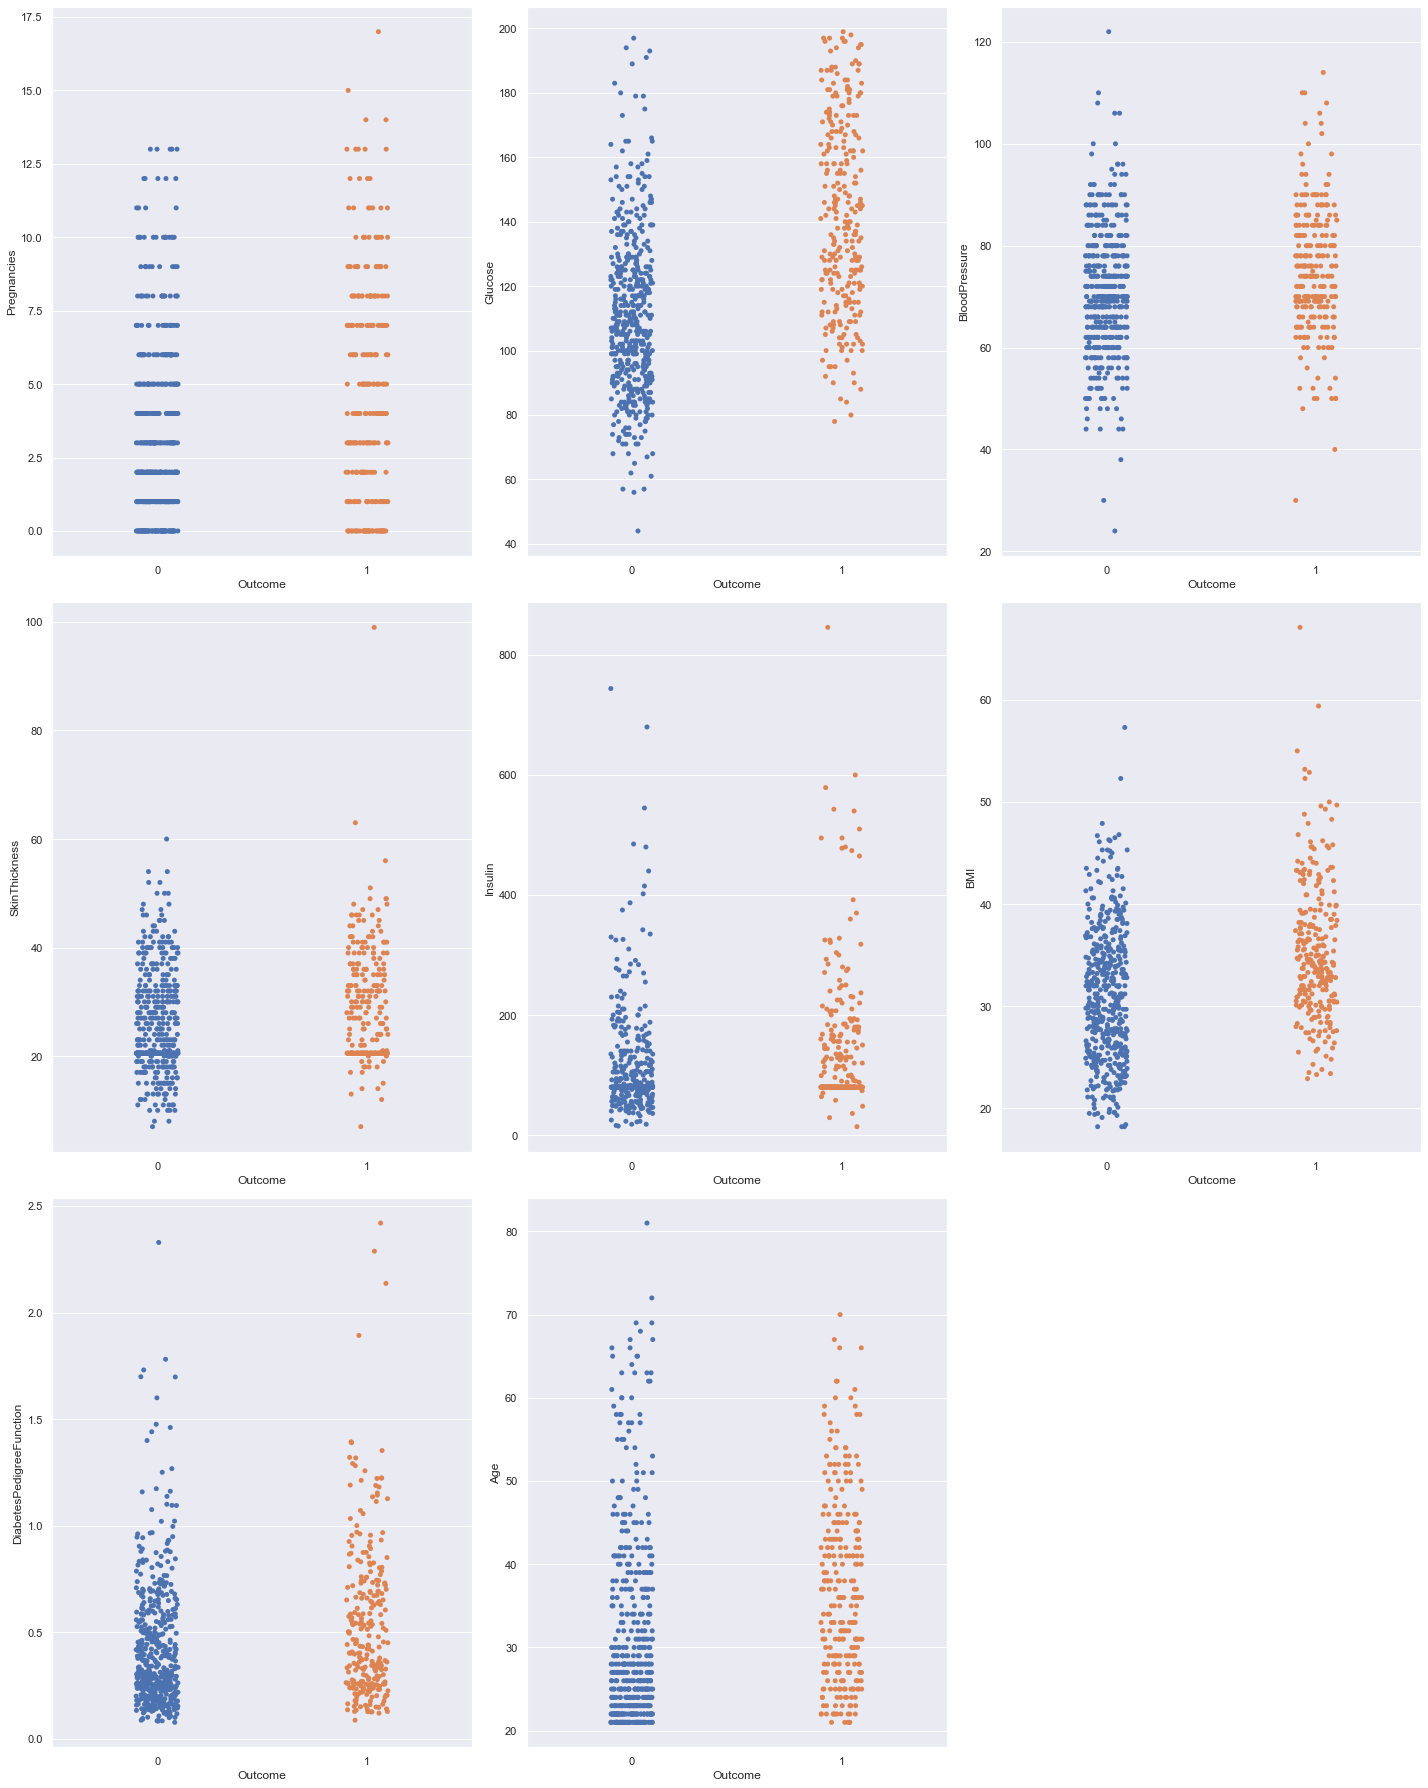

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber <=9:
      ax=plt.subplot(3,3,plotnumber)
      sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

now check multicollinearity in the dependent variables.and bedore that we have to scale our data.Let's use standard scaler for that

In [40]:
scalar =StandardScaler()
x_scaled = scalar.fit_transform(x) 

In [41]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [42]:
vif =pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

#let's check the value
vif

,vif,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the vif values are less than 5 and are very low .that means no multicolinearity.Now we go ahead  with fitting our data to the model. Before that,let's split our data in test and training set

In [46]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size =0.25,random_state=355)

In [50]:
log_reg =LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred =log_reg.predict(x_test)

In [53]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

So, My model is 75% accurate.